In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr, zscore

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [33]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Credit Cards Fraud Submit/public.csv')

#Ở phần này, ta sẽ tiến hành đổi tên các cột để nhìn cho dễ hơn:
data = data.rename(columns = {'txkey': 'transaction key', 'locdt': 'local date', 'loctm': 'local time', 'chid': 'customer ID',
                              'cano': 'card number', 'contp': 'contact type', 'etymd': 'entry method', 'mchno': 'merchant number',
                              'acqic': 'acquiring institution code', 'mcc': 'merchant category code', 'conam': 'transaction amount',
                              'ecfg': 'e-commerce flag', 'insfg': 'installment flag', 'iterm': 'installment terms', 'bnsfg': 'bonus flag',
                              'flam1': 'fraud alarm feature 1', 'stocn': 'store country', 'scity': 'store city', 'stscd': 'store status code',
                              'ovrlt': 'override flag', 'flbmk':'fraud benchmark flag', 'hcefg': 'high credit exposure flag',
                              'csmcu':'customer segment code', 'csmam': 'customer cumulative amount', 'flg_3dsmk': '3D Secure flag'})

# **GIẢI THÍCH DỮ LIỆU:**

**txkey:** Mã giao dịch duy nhất để nhận diện mỗi giao dịch.

**locdt:** Ngày giao dịch (có thể được định dạng dưới dạng số hoặc chuỗi ngày tháng).

**loctm:** Thời gian giao dịch (có thể được định dạng dưới dạng giờ, phút, giây).

**chid:** Mã chi nhánh hoặc mã cửa hàng nơi giao dịch được thực hiện.

**cano:** Mã số thẻ (có thể được mã hóa hoặc ẩn danh để bảo vệ thông tin cá nhân).

**contp:** Loại liên hệ (có thể là trực tiếp, trực tuyến, qua điện thoại, v.v.).

**etymd:** Ngày hiệu lực của giao dịch (thường là ngày mà giao dịch bắt đầu có hiệu lực).

**mchno:** Mã máy chủ hoặc thiết bị mà giao dịch được thực hiện.

**acqic:** Mã tổ chức nhận giao dịch (acquirer institution code) - tổ chức tài chính chịu trách nhiệm xử lý giao dịch.

**mcc:** Mã loại ngành nghề (Merchant Category Code) - phân loại loại cửa hàng hoặc dịch vụ nơi giao dịch được thực hiện.

**conam:** Số tiền giao dịch (có thể được định dạng theo tiền tệ cụ thể).

**ecfg:** Cấu hình của giao dịch (có thể liên quan đến các thiết lập hoặc điều kiện giao dịch).

**insfg:** Cờ xác thực (indicator flag) liên quan đến xác thực của giao dịch.

**iterm:** Loại thiết bị (device type) mà giao dịch được thực hiện (ví dụ: POS, ATM).

**bnsfg:** Cờ liên quan đến ngân sách (budget flag) hoặc các vấn đề tài chính khác liên quan đến giao dịch.

**flam1:** Có thể là một cờ hoặc thông tin liên quan đến loại giao dịch đặc biệt hoặc các yếu tố khác ảnh hưởng đến giao dịch.

**stocn:** Mã quốc gia hoặc khu vực của cửa hàng nơi giao dịch được thực hiện.

**scity:** Thành phố nơi giao dịch được thực hiện.

**stscd:** Mã tiểu bang hoặc tỉnh nơi giao dịch được thực hiện.

**ovrlt:** Tình trạng vượt mức (overlimit status) của tài khoản hoặc thẻ.

**flbmk:** Cờ liên quan đến loại giao dịch hoặc thuộc tính của nó (có thể là một cờ đặc biệt để xác định loại giao dịch hoặc hành vi).

**hcefg:** Cờ liên quan đến tính hợp lệ hoặc bảo mật của giao dịch.

**csmcu:** Mã tiền tệ của giao dịch (currency code).

**csmam:** Số tiền bằng tiền tệ của giao dịch (có thể là số tiền gốc trước khi chuyển đổi).

**flg_3dsmk:** Cờ liên quan đến các giao dịch 3D Secure (tính năng bảo mật bổ sung cho giao dịch trực tuyến).

**label:** Nhãn xác định liệu giao dịch có phải là gian lận hay không (1 cho gian lận, 0 cho không gian lận).

In [34]:
data

,transaction key,local date,local time,customer ID,card number,contact type,entry method,merchant number,acquiring institution code,merchant category code,transaction amount,e-commerce flag,installment flag,installment terms,bonus flag,fraud alarm feature 1,store country,store city,store status code,override flag,fraud benchmark flag,high credit exposure flag,customer segment code,customer cumulative amount,3D Secure flag,label
0,beacc9417d560dad5b032e60fb4d25109fe8cb7b2e3a6e...,59,91032,cc23202836b05b932a5268d687624aed4b4d66a4319ac1...,2366bd9e9259c9f3854b38ebd55c8a84c1431eb898cfb2...,5,8.0,dd280b4f35a02701142ba7de47abb9736deca3eed86474...,46f63555d29f177290dfe20e989146fb033e453f1d5ff3...,320.0,230.0,1,0,0.0,0,230,0.0,13451.0,NaN,0,0,6.0,70.0,230,0,0
1,1a5c65ba37d178fd8929b39c092e8b7714c81dd4e47abf...,56,175527,0f94324e04a991b86f21b6fd6bacb85ffb2b99c3811a7f...,eb3219c0ef7408892ab3277441a75a991ea4366d8b342f...,5,4.0,8ada160a2abd4d98d52b69fbfb85fc624effa085754f8f...,2a608b081c09492bd2bc96d7def5371c4bc9cabf324a98...,395.0,3800.0,0,0,0.0,0,3813,0.0,16144.0,NaN,0,0,0.0,70.0,3813,0,0
2,726d128c9ac8cac7ef46e5487690214530a60a4ff05a61...,58,190402,133fa14964096f07400985721f526584fe8890eddb0e57...,dcf6a608b56a3e1001ea2fb395b1ab63afc36fbc861967...,5,4.0,a9393ffa505dcad8e0868ad63913a4afda4983c26dd726...,2fea345d14a69774026f3de93f5e3313219363d54e07b1...,282.0,45.0,0,0,0.0,0,45,0.0,8923.0,NaN,0,0,6.0,70.0,45,0,0
3,2eaba2e2063295a124818d5d5eb5329491ba6102148b88...,58,185315,00efd369cc05c3a849f4ec7bfc6d431707b013869b712a...,2d0d07dfa10b3ab0c283abdbbfda34867550581f09a060...,5,5.0,3f403ceff76d5871c6c96289940b75dbc5605bac3fe72c...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,273.0,384.0,1,0,0.0,0,385,0.0,15759.0,NaN,1,0,6.0,70.0,385,0,0
4,bea8466e3c72f9a5f7af99cb2e2c8a10aa000ce9094667...,58,211817,56120d9baa8e72e729bdfc6cef29a6c435ca64e1f18a20...,e9f9ba15aa2fb7e98810e181cd3b09739a69d132643730...,5,5.0,06ea27c9e7f3863f3a9f3400a3cf94842071ed674db44a...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,406.0,20.0,1,0,0.0,0,20,0.0,15759.0,NaN,0,0,6.0,70.0,20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641064,753f515346965f30f5c2d51c41d67cd06002d930d63b41...,57,191422,810520776aab46b766db4c3dcf323c66c5ba8a6371a315...,34b593375eb6a1d55a24baf1de842c98f2504557897657...,5,4.0,b12ee3399c347bcc5bd9863b49cc02d8734284011c48a2...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,276.0,1825.0,0,0,0.0,0,1824,0.0,15742.0,NaN,0,0,6.0,70.0,1824,0,0
641065,48d27f35e2838f8620d5622ebb3e1294bba631552b4632...,59,83750,2d9ba75adfe44c1a25bcd5086985b86bb0b47c932f5591...,cbd52a2de2a32b882abea68d41459aac6fc7d22a80cc28...,5,4.0,1ea112a0a243455476fc580dff6c24d2382e774270ae22...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,282.0,45.0,0,0,0.0,0,45,0.0,15759.0,NaN,0,0,0.0,70.0,45,0,0
641066,858f5d5b31d6438fc5b8f99d8f3d243883cb1b2e651fec...,58,223014,b9200f68215dd5d940ef535f53f40f90aa59f95b290779...,9332643e28c87304eb77a85d7446aead870f564ed4d1ab...,5,5.0,e87c8937886d25f5d792402558aabaa3911bfae326984c...,379166ff4a62dac343b4b734188aa618716cc496e48b65...,272.0,10800.0,1,0,0.0,0,10839,0.0,15759.0,NaN,0,0,6.0,70.0,10839,1,0
641067,9a5e4e427fd4482fb2e4ad2f2ed51d8f97177497ba78a8...,58,120537,cca84cf73b5d4d73c68058db0aed5aa0eced05ec692811...,4f1948867c73bd4d1eb7565894bf5d60cf48df6c72dbea...,5,4.0,ab15d7d1c3b160f61defe91c801911b8c1928f1d5f9f3d...,bcf6370b700fb26d1fab05dad5de442b2bf37689cb55fd...,281.0,846.0,0,0,0.0,0,847,0.0,15759.0,NaN,0,0,6.0,70.0,847,0,0


# **DROPPING OUTLIERS**

In [35]:
data.isnull().sum()

,0
transaction key,0
local date,0
local time,0
customer ID,0
card number,0
contact type,0
entry method,14110
merchant number,0
acquiring institution code,0
merchant category code,362


In [36]:
#Ở đây các dòng null chiếm không nhiều, vì vậy ta cứ xóa đi bình thường là được:
data = data.drop(columns = ['store status code'])
data = data.dropna()

In [37]:
category_cols = ['local date', 'contact type', 'entry method', 'merchant number', 'acquiring institution code',
                 'merchant category code', 'e-commerce flag', 'installment flag', 'installment terms', 'bonus flag',
                 'store country', 'store city', 'override flag', 'fraud benchmark flag', 'high credit exposure flag',
                 'customer segment code', '3D Secure flag']

numeric_cols = ['local time', 'transaction amount', 'fraud alarm feature 1', 'customer cumulative amount']

***Ở đây, ta sẽ tính Skewness nhằm loại bỏ bớt đi các giá trị outliers ở phần label = 0, nhưng toàn bộ các label = 1 sẽ được giữ lại***

In [38]:
df0 = data[data['label'] == 0]
df1 = data[data['label'] == 1]

***Tính Skewness chỉ cho df0***

In [39]:
#Tính Skewness cho numeric_cols:
for i in numeric_cols:
  skewness = skew(df0[i])
  print(f"Skewness của cột {i}:", skewness)

Skewness của cột local time: -0.509017937971284
Skewness của cột transaction amount: 166.92797475117945
Skewness của cột fraud alarm feature 1: 166.6010057517307
Skewness của cột customer cumulative amount: 425.20102063315966


In [40]:
#IQR cho 3 columns là 'transaction amount', 'fraud alarm feature 1', 'customer cumulative amount':
for i in ['transaction amount', 'fraud alarm feature 1', 'customer cumulative amount']:
  #tính toán IQR thông qua Q1,
  Q1 = df0[i].quantile(0.25)
  Q3 = df0[i].quantile(0.75)
  IQR = Q3 - Q1

  # Xác định ngưỡng cho giá trị ngoại lệ
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Nếu bạn muốn loại bỏ các giá trị ngoại lệ
  df0 = df0[(df0[i] >= lower_bound) & (df0[i] <= upper_bound)]

print("Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:")
print(df0.shape)

Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:
(449521, 25)


In [41]:
#Z-score cho column 'local time':
threshold = 3

df0.loc[:, 'z_score'] = zscore(df0['local time'])
df0 = df0[(df0['z_score'] <= threshold) & (df0['z_score'] >= -threshold)]

# Loại bỏ cột 'z_score' sau khi lọc
df0 = df0.drop(columns=['z_score'])

print("Dữ liệu sau khi loại bỏ các ngoại lệ bằng phương pháp Z-score:")
print(df0.shape)

<ipython-input-41-0d8c0a080766>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.loc[:, 'z_score'] = zscore(df0['local time'])


Dữ liệu sau khi loại bỏ các ngoại lệ bằng phương pháp Z-score:
(449521, 25)


In [42]:
#Sau khi đã loại bỏ ngoại lệ, ta gộp nhất 2 dataframe lại với nhau:
data_new = pd.concat([df0, df1])
data_new = data_new.sample(frac = 1)

# **FEATURES SELECTION**

***Kiểm định Chi-squared cho các columns phân loại***

In [43]:
remove_obj_cols =[]

#Chi-square test cho các cột Object so với cột Output của data
for i in category_cols:
  chi2, pval, _, _ = chi2_contingency(pd.crosstab(data_new[i], data_new['label']))
  print(i, '---', pval)
  if pval > 0.05:
    remove_obj_cols.append(i)
  else:
    continue
print(remove_obj_cols)

local date --- 0.0
contact type --- 0.0
entry method --- 0.0
merchant number --- 0.0
acquiring institution code --- 0.0
merchant category code --- 0.0
e-commerce flag --- 0.0
installment flag --- 0.0004929916491836801
installment terms --- 3.778819884274423e-17
bonus flag --- 9.02095830601211e-09
store country --- 0.0
store city --- 0.0
override flag --- 0.0
fraud benchmark flag --- 0.7004035972369291
high credit exposure flag --- 0.0
customer segment code --- 0.0
3D Secure flag --- 6.476310587265835e-291
['fraud benchmark flag']


In [44]:
data_new = data_new.drop(columns = remove_obj_cols)
category_cols = [i for i in category_cols if i not in remove_obj_cols]

***Tương tự, Spearman Correlation cho các biến liên tục***

In [45]:
spear_cols = numeric_cols
spear_cols.append('label')
spearman_df = data_new[spear_cols]
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spearman_df.columns:
  if col == 'label':
    continue
  else:
    corr, p_value = spearmanr(spearman_df[col], spearman_df['label'])
    correlation_results.append((col, corr, p_value))

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
1,transaction amount,0.180900,0.000000e+00
2,fraud alarm feature 1,0.180785,0.000000e+00
3,customer cumulative amount,0.089671,0.000000e+00
0,local time,-0.036429,1.606716e-141


In [46]:
data_new = data_new.drop(columns = ['local time'])
numeric_cols = [i for i in numeric_cols if i != 'local time']

# **EDA**

In [48]:
#Xóa bớt đi các columns về ID:
drop_ID_cols = ['transaction key', 'local date', 'customer ID', 'card number', 'merchant number']
data_new = data_new.drop(columns = drop_ID_cols)
category_cols = [i for i in category_cols if i not in drop_ID_cols]
numeric_cols = [i for i in numeric_cols if i not in drop_ID_cols]

In [49]:
for i in category_cols:
  print(i, len(data_new[i].unique()))

contact type 5
entry method 10
acquiring institution code 1105
merchant category code 316
e-commerce flag 2
installment flag 2
installment terms 5
bonus flag 2
store country 85
store city 3634
override flag 2
high credit exposure flag 11
customer segment code 58
3D Secure flag 2


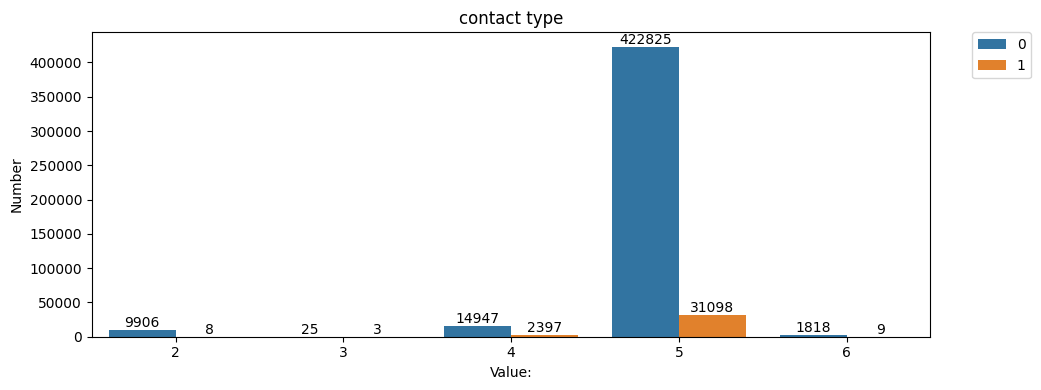

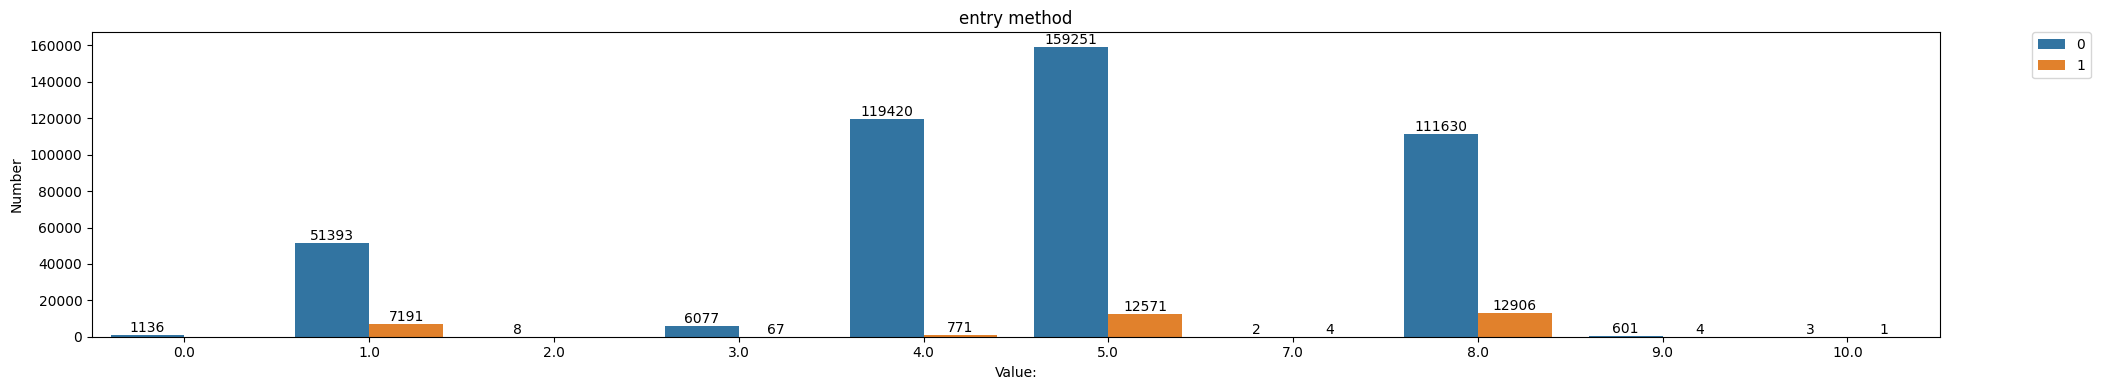

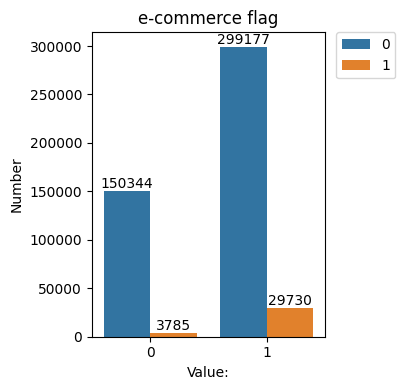

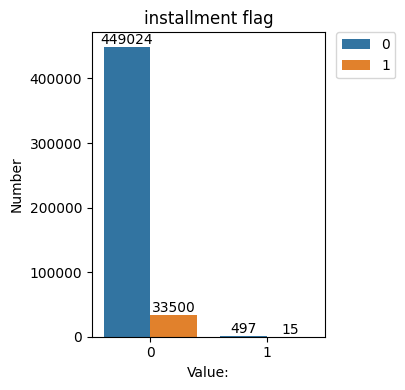

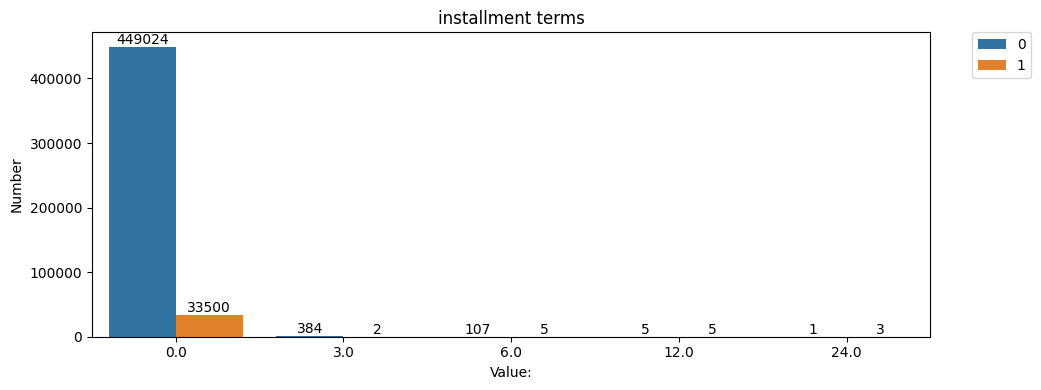

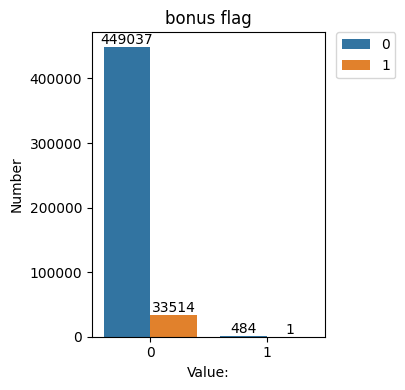

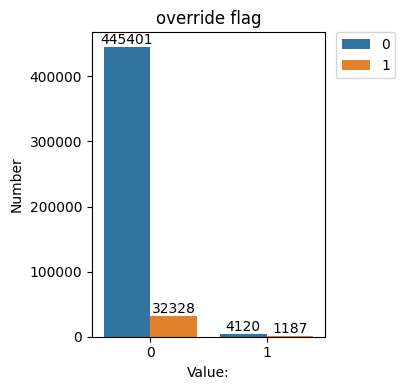

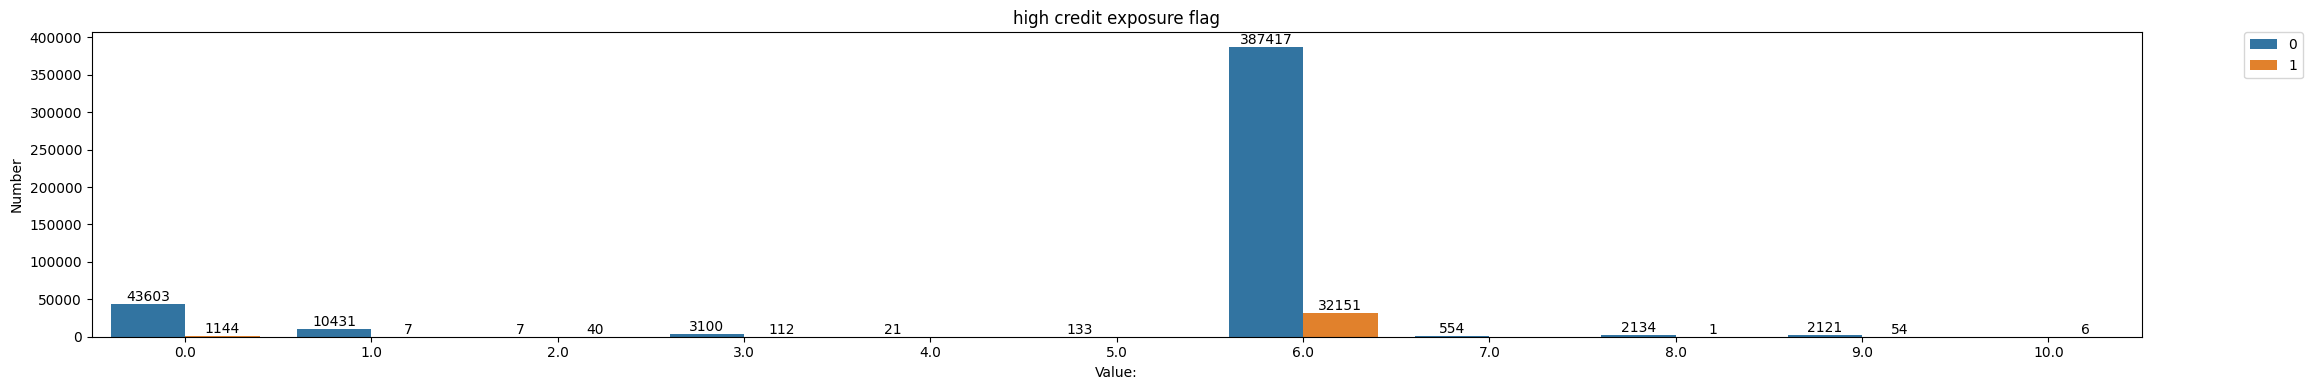

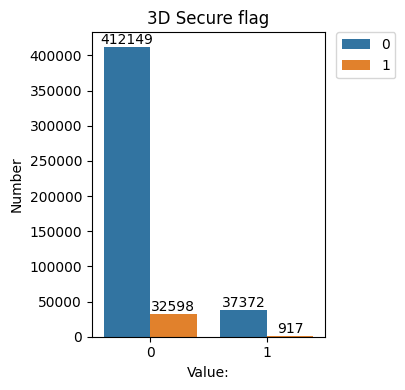

In [50]:
for i in category_cols:
  not_EDA_ls = ['acquiring institution code', 'merchant category code', 'store country', 'store city', 'customer segment code']
  if i in not_EDA_ls:
    continue
  else:
    ax1 = sns.countplot(x=i, hue='label', data=data_new)
    ax1.set_xlabel('Value:')
    ax1.set_ylabel('Number')
    ax1.set_title(i)
    plt.gcf().set_size_inches(len(data_new[i].unique()) * 2.1, 4)

    for container in ax1.containers:
      ax1.bar_label(container)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.show()

***Corr Matrix***

In [55]:
#Encoding cho columns 'acquiring institution code':
value_counts = data_new['acquiring institution code'].value_counts().index
value_to_label = {value: idx for idx, value in enumerate(value_counts)}
data_new['acquiring institution code'] = data_new['acquiring institution code'].map(value_to_label)

In [56]:
corr = data_new.corr()
corr.style.background_gradient(cmap='coolwarm')

,contact type,entry method,acquiring institution code,merchant category code,transaction amount,e-commerce flag,installment flag,installment terms,bonus flag,fraud alarm feature 1,store country,store city,override flag,high credit exposure flag,customer segment code,customer cumulative amount,3D Secure flag,label
contact type,1.000000,0.279014,-0.018611,-0.004796,0.000497,0.226674,0.002880,0.003766,0.007527,0.000486,-0.013235,-0.043131,0.014358,-0.020733,0.022290,0.001320,0.062300,0.012734
entry method,0.279014,1.000000,-0.063444,-0.014367,-0.005707,0.495067,0.008632,0.007447,0.016856,-0.005695,0.036405,0.053590,0.008815,0.006235,0.031628,-0.000794,0.201945,0.033406
acquiring institution code,-0.018611,-0.063444,1.000000,0.053498,0.120135,-0.028494,-0.006418,-0.005512,-0.007262,0.120070,0.268845,-0.193827,0.035332,0.011136,-0.254791,0.038267,-0.006219,0.249725
merchant category code,-0.004796,-0.014367,0.053498,1.000000,-0.015023,0.064882,-0.009883,-0.008398,-0.013471,-0.015003,0.142992,-0.051307,0.008099,0.072651,0.027998,0.006911,-0.052975,0.114780
transaction amount,0.000497,-0.005707,0.120135,-0.015023,1.000000,0.004912,0.005780,0.011475,-0.001284,0.999997,0.091080,-0.088276,0.093371,0.012495,-0.113332,0.100143,0.004765,0.203465
e-commerce flag,0.226674,0.495067,-0.028494,0.064882,0.004912,1.000000,0.010970,0.011059,0.016934,0.004905,0.172986,-0.130978,0.015099,0.207799,0.008283,0.000428,0.200857,0.120761
installment flag,0.002880,0.008632,-0.006418,-0.009883,0.005780,0.010970,1.000000,0.852376,0.007003,0.005761,-0.013042,0.011814,0.000839,0.009389,0.003373,-0.000070,0.040604,-0.005139
installment terms,0.003766,0.007447,-0.005512,-0.008398,0.011475,0.011059,0.852376,1.000000,0.004262,0.011442,-0.011117,0.008883,0.004104,0.008433,0.002875,0.000078,0.040227,0.001391
bonus flag,0.007527,0.016856,-0.007262,-0.013471,-0.001284,0.016934,0.007003,0.004262,1.000000,-0.001621,-0.012693,0.014855,-0.002087,0.031549,0.003282,-0.000214,-0.000108,-0.008399
fraud alarm feature 1,0.000486,-0.005695,0.120070,-0.015003,0.999997,0.004905,0.005761,0.011442,-0.001621,1.000000,0.091034,-0.088227,0.093341,0.012479,-0.113264,0.100255,0.004755,0.203340


In [57]:
#Lọc ra các cặp có giá trị corr > 0.5
corr_pairs = corr.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]

high_corr_pairs = corr_pairs[corr_pairs > 0.5]
high_corr_pairs = high_corr_pairs.iloc[::2]

#Lọc ra các giá trị corr giữa các biến đầu vào và output
corr_label = corr['label']

#So sánh 2 biến có corr cao, nếu biến nào mà corr của nó với output thấp hơn thì sẽ được loại, ngược lại thì lưu
#Việc này giúp 2 điều: Xóa đi 1 giá trị trong cặp biến có Corr lớn, và xóa đi giá trị ít tác động đến đầu ra
columns_to_remove = []
for col1, col2 in high_corr_pairs.index:
  if col1 == 'label' or col2 == 'label':
    continue
  else:
    # So sánh giá trị trong corr_label và chọn cột có giá trị thấp hơn để xóa
    if corr_label[col1] < corr_label[col2]:
        columns_to_remove.append(col1)
    else:
        columns_to_remove.append(col2)

#Lọc đi các giá rị trùng lặp
columns_to_remove = list(set(columns_to_remove))
#print(columns_to_remove)

data_new = data_new.drop(columns = columns_to_remove)

In [58]:
data_new

,contact type,entry method,acquiring institution code,merchant category code,transaction amount,e-commerce flag,installment terms,bonus flag,store country,store city,override flag,high credit exposure flag,customer segment code,customer cumulative amount,3D Secure flag,label
375940,5,4.0,22,276.0,1044.00,0,0.0,0,0.0,16112.0,0,6.0,70.0,1042,0,0
566,5,5.0,0,272.0,407.00,1,0.0,0,0.0,15759.0,0,6.0,70.0,407,0,0
439858,5,4.0,4,322.0,301.00,0,0.0,0,0.0,13248.0,0,6.0,70.0,300,0,0
75295,5,8.0,1,320.0,260.00,1,0.0,0,0.0,16115.0,0,0.0,70.0,259,1,0
363077,5,5.0,21,323.0,268.00,1,0.0,0,112.0,15661.0,0,6.0,70.0,267,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49499,5,1.0,583,321.0,0.00,0,0.0,0,21.0,16738.0,0,6.0,10.0,0,0,1
65472,5,1.0,208,230.0,1197.68,1,0.0,0,21.0,16331.0,0,6.0,10.0,51,0,0
341330,5,4.0,0,452.0,200.00,0,0.0,0,0.0,15742.0,0,6.0,70.0,201,0,0
194083,5,8.0,1,320.0,258.00,1,0.0,0,0.0,13451.0,0,6.0,70.0,257,0,0


# **PREDICTION**

In [59]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['label'], axis=1)
    features = X.columns

    y = data['label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #MinMax Scaler
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [60]:
X_train, X_test, y_train, y_test = preprocess_data(data_new)

***1.Random Forest***

In [65]:
model_RF = RandomForestClassifier(n_estimators=200, random_state=42, class_weight = 'balanced')
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    359699
           1       0.68      0.97      0.80     26729

    accuracy                           0.97    386428
   macro avg       0.84      0.97      0.89    386428
weighted avg       0.98      0.97      0.97    386428

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     89822
           1       0.66      0.91      0.77      6786

    accuracy                           0.96     96608
   macro avg       0.83      0.94      0.87     96608
weighted avg       0.97      0.96      0.96     96608



***2.XGBOOST***

In [66]:
model_XGB = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    359699
           1       0.96      0.78      0.86     26729

    accuracy                           0.98    386428
   macro avg       0.97      0.89      0.93    386428
weighted avg       0.98      0.98      0.98    386428

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     89822
           1       0.95      0.76      0.85      6786

    accuracy                           0.98     96608
   macro avg       0.97      0.88      0.92     96608
weighted avg       0.98      0.98      0.98     96608



***3.SMOTE***

In [67]:
# Áp dụng SMOTE để tăng cường lớp 1
class_counts = y_train.value_counts()
smote = SMOTE(sampling_strategy={1: int(0.75 * class_counts[0])}, random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [68]:
model_XGB_2 = xgb.XGBClassifier(n_estimators=200, random_state=42)
model_XGB_2.fit(X_train_resample, y_train_resample)

y_train_pred = model_XGB_2.predict(X_train_resample)
y_test_pred = model_XGB_2.predict(X_test)

print_scores(y_train_resample, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    359699
           1       0.94      0.96      0.95    269774

    accuracy                           0.96    629473
   macro avg       0.96      0.96      0.96    629473
weighted avg       0.96      0.96      0.96    629473

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     89822
           1       0.61      0.94      0.74      6786

    accuracy                           0.95     96608
   macro avg       0.80      0.95      0.86     96608
weighted avg       0.97      0.95      0.96     96608



***4.CATBOOST***

In [71]:
model_CB = CatBoostClassifier(iterations=200,random_seed=42)
model_CB.fit(X_train, y_train)

y_train_pred = model_CB.predict(X_train)
y_test_pred = model_CB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

Learning rate set to 0.5
0:	learn: 0.1382723	total: 354ms	remaining: 1m 10s
1:	learn: 0.0962085	total: 564ms	remaining: 55.9s
2:	learn: 0.0849850	total: 745ms	remaining: 48.9s
3:	learn: 0.0807696	total: 973ms	remaining: 47.7s
4:	learn: 0.0790392	total: 1.21s	remaining: 47.3s
5:	learn: 0.0774173	total: 1.46s	remaining: 47.1s
6:	learn: 0.0764582	total: 1.7s	remaining: 46.8s
7:	learn: 0.0755059	total: 2.03s	remaining: 48.8s
8:	learn: 0.0743189	total: 2.38s	remaining: 50.5s
9:	learn: 0.0736027	total: 2.62s	remaining: 49.9s
10:	learn: 0.0731568	total: 2.81s	remaining: 48.3s
11:	learn: 0.0724499	total: 3.1s	remaining: 48.7s
12:	learn: 0.0719446	total: 3.43s	remaining: 49.4s
13:	learn: 0.0709649	total: 3.72s	remaining: 49.4s
14:	learn: 0.0705086	total: 4.03s	remaining: 49.7s
15:	learn: 0.0699234	total: 4.41s	remaining: 50.7s
16:	learn: 0.0692384	total: 4.68s	remaining: 50.4s
17:	learn: 0.0687353	total: 4.94s	remaining: 49.9s
18:	learn: 0.0684511	total: 5.12s	remaining: 48.8s
19:	learn: 0.0680

***5.Stacking: Kết hợp Random forest và XGBoost***

In [73]:
# Tạo dự đoán cho các mô hình cấp 1
y_train_pred_XGB = model_XGB.predict_proba(X_train)[:, 1]
y_test_pred_XGB = model_XGB.predict_proba(X_test)[:, 1]

y_train_pred_RF = model_RF.predict_proba(X_train)[:, 1]
y_test_pred_RF = model_RF.predict_proba(X_test)[:, 1]

# Tạo dữ liệu cho mô hình meta
train_meta_features = np.vstack((y_train_pred_XGB, y_train_pred_RF)).T
test_meta_features = np.vstack((y_test_pred_XGB, y_test_pred_RF)).T

# Huấn luyện mô hình meta
meta_model = xgb.XGBClassifier()
meta_model.fit(train_meta_features, y_train)

# Dự đoán với mô hình meta trên tập kiểm tra
y_test_pred_meta = meta_model.predict(test_meta_features)
print_scores(y_test, y_test_pred_meta)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     89822
           1       0.93      0.79      0.85      6786

    accuracy                           0.98     96608
   macro avg       0.96      0.89      0.92     96608
weighted avg       0.98      0.98      0.98     96608



***Về cơ bản, XGBOOST và Stacking cho kết quả ngang nhau; Nếu chọn ta có thể chọn 2 thuật toán này***

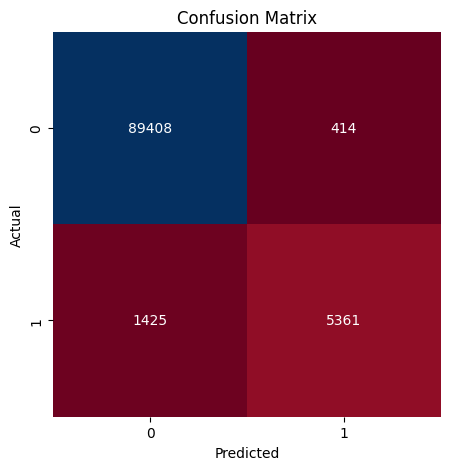

In [81]:
plt.figure(figsize=(5,5))
cm = confusion_matrix(y_test, y_test_pred_meta)
sns.heatmap(cm, annot=True, fmt="d", cmap="RdBu", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()